# K-Means Clustering
##### From exercise 7

In [5]:
#K-means clustering is iterative unsupervised clustering that groups similar instances into clusters
#"The algorithm starts by guessing the initial centroids for each cluster, and then repeatedly assigns instances to the nearest cluster and re-computes the centroid of that cluster."

#First we need to create a function to find the closest centroid for each instance of the data:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline


def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [6]:
#Test the function using test case in exercise.
os.chdir('..')
data = loadmat('data/ex7data2.mat')
X = data['X']
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [7]:
#Next define a function to compute the centroid of a cluster... Simply the mean of all examples in the cluster.


def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [10]:
#Now we need an algorithm to run through iterations and visualize the result.
#We will need to alternate between assigning examples to nearest cluster and re-computing cluster centroids.


def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

idx, centroids = run_k_means(X, initial_centroids, 10)

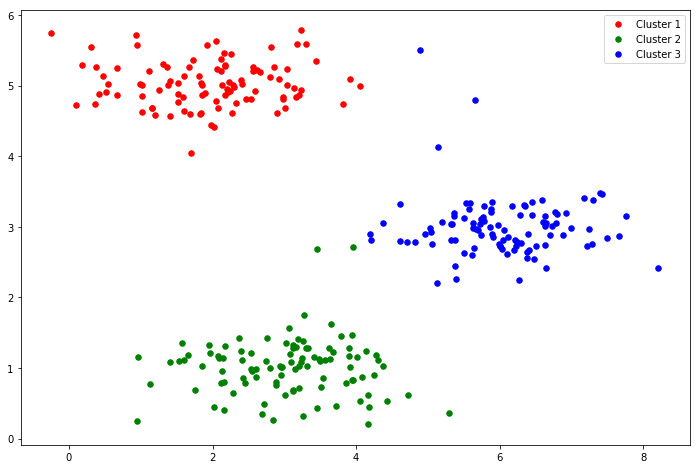

In [13]:
#Plot the result
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

In [14]:
#We skipped the process to initialize centroids and this can affect convergence.
#We can select random examples and use them as initial centroids.


def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

init_centroids(X, 3)

array([[3.81422865, 4.73526796],
       [6.62447253, 2.74453743],
       [2.32558253, 4.74867962]])

In [15]:
#Now that we have our algorithm, we can apply K-means clustering.
#We can use K-means for image compression. Use clustering to find a small number of colors that are most representative of the image.
#Then map the colors to a lower color space using the assignments.

image_data = loadmat('data/bird_small.mat')
image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [16]:
#The shape looks like what we would expect in an image. 128pixels by 128pixels with the RGB numbers for that pixel.
A = image_data['A']
A.shape

(128, 128, 3)

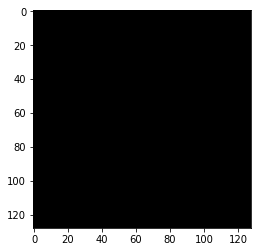

In [22]:
#Pre-processing and run K-means

#Normalize value ranges of colors (max RGB is 255)
A = A / 255.

#Reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))

#Randomly Initialize Centroids
initial_centroids = init_centroids(X, 16)

#Run K-means algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

#Get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

#Map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

#Reshape to original image dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)

# Principal Component Analysis (PCA)
##### From exercise 7

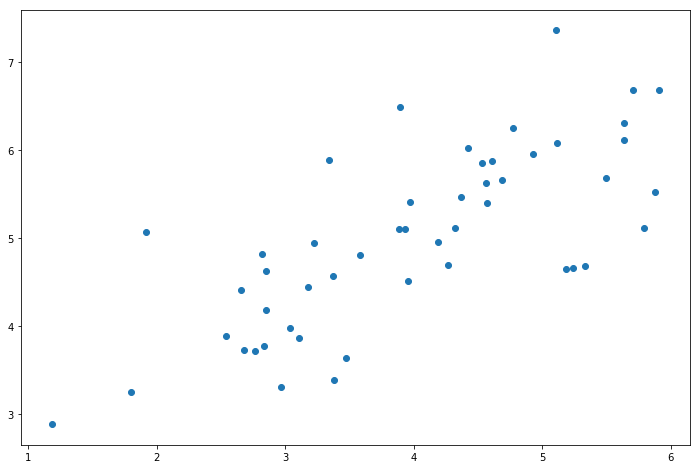

In [26]:
#Start with simple PCA on a 2-dimensional dataset
data = loadmat('data/ex7data1.mat')
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])

In [27]:
#Create a PCA algorithm. Need to ensure that the data is normalized. 
#The output is the singular value decomposition of the covariance matrix of the original data.
#Can use numpy's functions to calculate covariance and SVD instead of building.


def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

U, S, V = pca(X)
U, S, V


(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [28]:
#Now we have matrix U as our principal components. Implement a function that computes the projections and selects top K components.


def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

Z = project_data(X, U, 1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [37]:
#Can also attempt to recover the original data by reversing steps taken to project it.


def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

In [51]:
#Let's apply PCA to images of faces. This will capture the :essebce: if the image using much less data

faces = loadmat('data/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

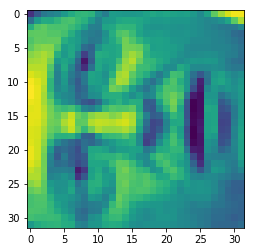

In [52]:
face = np.reshape(X[3,:], (32, 32))
plt.imshow(face)

In [53]:
#Looks bad. Either way, lets run PCA and take the top 100 pricipal components.

U, S, V = pca(X)
Z=project_data(X, U, 100)

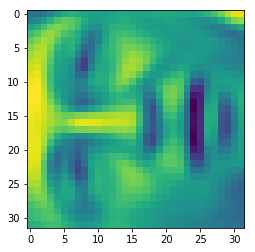

In [54]:
#Now attempt to recover image and render it again
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)